#**Flower Segmentation using Various Techniques**

In [10]:
import cv2 
import numpy as np 
from google.colab.patches import cv2_imshow

# Using OpenCV Contours to detect closed regions

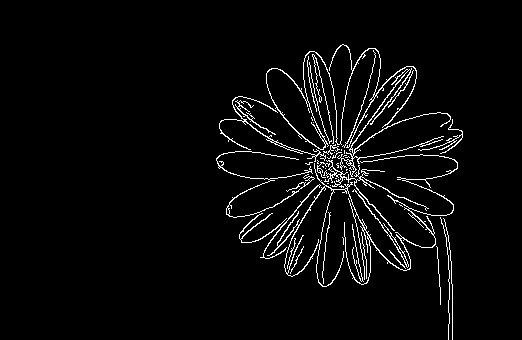

In [17]:
image = cv2.imread('flower.webp') 
copy = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
edged = cv2.Canny(gray, 30, 200) 
contours, hierarchy = cv2.findContours(edged, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE) 
cv2_imshow(edged) 

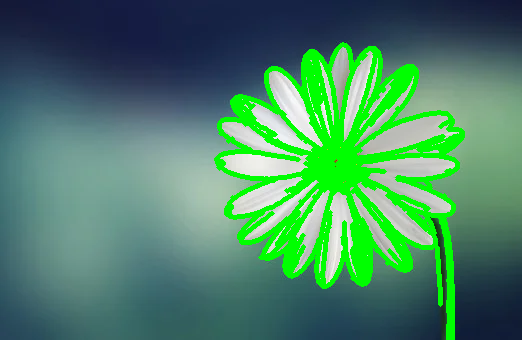

In [18]:
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 
cv2_imshow(image) 

# Using Color Range to detect white region

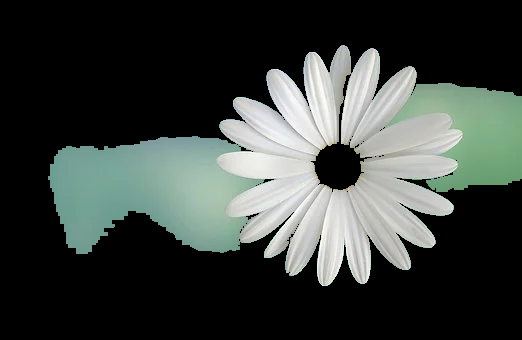

In [19]:
img = copy.copy()
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
sensitivity = 100
lower_white = np.array([0,0,255-sensitivity])
upper_white = np.array([255,sensitivity,255])
mask = cv2.inRange(hsv, lower_white, upper_white)

mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((3,3),np.uint8))
masked = cv2.bitwise_and(img,img,mask=mask)
cv2_imshow(masked)

# Using Semantic Segmentation with Deep Learning (U-Net) and Other Models

In [ ]:
!pip install keras_segmentation

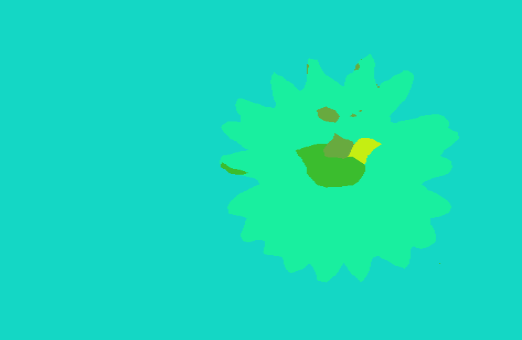

In [32]:
from keras_segmentation.pretrained import pspnet_50_ADE_20K , pspnet_101_cityscapes, pspnet_101_voc12

model = pspnet_50_ADE_20K() 

out = model.predict_segmentation(
    inp="flower.webp",
    out_fname="out.png"
)

res = cv2.imread('out.png')
cv2_imshow(res)

## Other Images

In [ ]:
!pip install pixellib

In [ ]:
!wget https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.2/mask_rcnn_coco.h5

In [49]:
import pixellib
from pixellib.instance import instance_segmentation
import cv2

instance_seg = instance_segmentation()
instance_seg.load_model("mask_rcnn_coco.h5")
segmask, output = instance_seg.segmentImage("street.jpeg")
cv2.imwrite("img.jpg", output)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


True

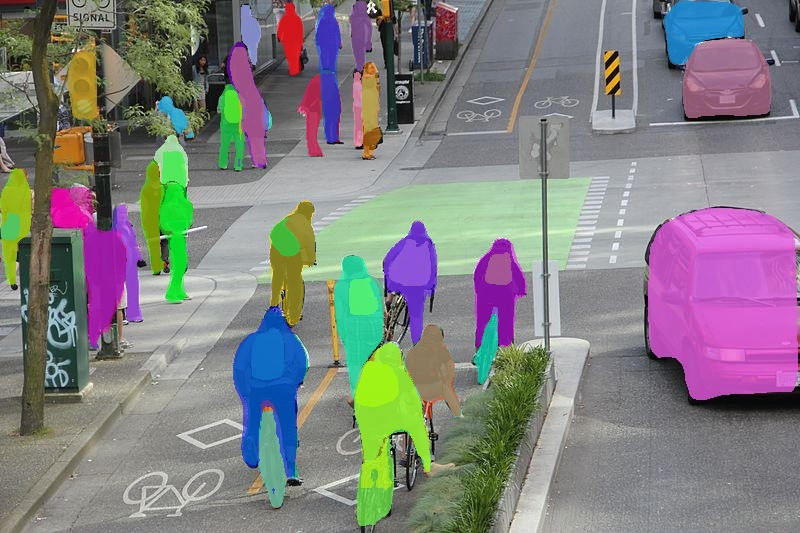

In [50]:
res = cv2.imread('img.jpg')
cv2_imshow(res)